In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/')
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/data')
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/rl2')

### check if performance of trained meta-learning model makes sesne

In [4]:
import torch
from rl2.envs import CategorisationTask
import argparse
from baseline_classifiers import SVMModel, LogisticRegressionModel
import matplotlib.pyplot as plt
from rl2.evaluate import evaluate

In [5]:
env_name = '/raven/u/ajagadish/vanilla-llama/categorisation/data/llama_generated_tasks_params65B_dim3_data8_tasks14500.csv'
model_path = '../trained_models/env=llama_generated_tasks_params65B_dim3_data8_tasks14500_num_episodes100000_num_hidden=128_lr0.0003_run=0.pt'
#env=llama_generated_tasks_params65B_dim3_data8_tasks14500_run=0.pt'
mode = 'val'
# load the eval data from environment
env = CategorisationTask(data=env_name, mode=mode)
_, _, _, info = env.reset()

# train svm classified on the same
X = info['inputs']
y = info['targets']
X = X.view(X.shape[0]*X.shape[1], X.shape[2])
y = y.view(y.shape[0]*y.shape[1])
performance = []
lr = LogisticRegressionModel(X,y)
svm = SVMModel(X,y)
ml2 = evaluate(env_name=env_name, model_path=model_path, mode=mode, policy='greedy')
performance.append([lr.score(X, y), svm.score(X, y), ml2])

Text(0, 0.5, 'Score')

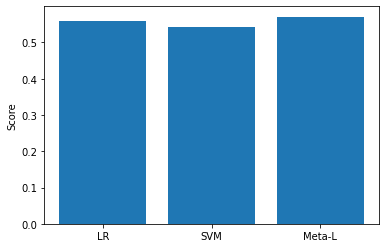

In [6]:
# plot its performance against the meta-learning models performance
plt.bar(['LR', 'SVM', 'Meta-L'], performance[0])
plt.ylabel('Score')

### evaluate trained model

In [2]:
from rl2.evaluate import evaluate

In [36]:
evaluate(env_name='/raven/u/ajagadish/vanilla-llama/categorisation/data/llama_generated_tasks_params65B_dim3_data8_tasks14500.csv', model_path='../trained_models/env=llama_generated_tasks_params65B_dim3_data8_tasks14500_run=0.pt', mode='val', policy='greedy')

tensor(0.5575)

In [10]:
from rl2.rl2 import RL2
from envs import CategorisationTask
import torch

In [12]:
env_name = '/raven/u/ajagadish/vanilla-llama/categorisation/data/llama_generated_tasks_params65B_dim3_data8_tasks14500.csv'# if args.env_name is None else args.env_name
env = CategorisationTask(data=env_name, mode='test')
policy = 'greedy'

model = torch.load('./test')[1]
model.eval()

inputs, targets, done, info = env.reset()
hx, cx = model.initial_states(env.batch_size)
model_choices = []
true_choices = []
while not done:
    model_choice, hx, cx = model(inputs.unsqueeze(1).float(), hx, cx)
    true_choice = targets
    model_choices.append(model_choice)
    true_choices.append(true_choice)
    inputs, targets, done, info = env.step() 
model_choices = torch.stack(model_choices).squeeze()
true_choices = torch.stack(true_choices)

true_choices.shape, model_choices.shape

#predictions = model_choices.squeeze().argmax(2).reshape(-1)
predictions = model_choices.argmax(2).reshape(-1) if policy=='greedy' else \
          model_choices.view(model_choices.shape[0]*model_choices.shape[1], model_choices.shape[2]).multinomial(1).reshape(-1)
accuracy = (true_choices.reshape(-1)==predictions).sum()/(len(predictions))
print(accuracy)

tensor(0.5623)


###  test trainer 

In [2]:
from rl2.train import run
import matplotlib.pyplot as plt

In [7]:
env_name = '/raven/u/ajagadish/vanilla-llama/categorisation/data/llama_generated_tasks_params65B_dim3_data8_tasks14500.csv'# if args.env_name is None else args.env_name
num_episodes = 10
print_every = 1
save_every = 1
num_hidden = 128
save_dir = 'test'
device = 'cpu'
lr = 0.001
batch_size= 32

In [8]:
loss = run(env_name, num_episodes, print_every, save_every, num_hidden, save_dir, device, lr, batch_size)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.29it/s]


### test model 

In [5]:
from model import RL2
import torch

In [6]:
model = RL2(3, 2, 10, 1)
hx, cx = torch.randn(1, 32, 10), torch.randn(1, 32, 10)

In [7]:
model_choice, hx, cx = model(torch.zeros(32, 1, 3), hx, cx)

In [8]:
model_choice

tensor([[[0.6750, 0.3250]],

        [[0.5648, 0.4352]],

        [[0.6343, 0.3657]],

        [[0.5977, 0.4023]],

        [[0.4539, 0.5461]],

        [[0.5511, 0.4489]],

        [[0.5057, 0.4943]],

        [[0.6200, 0.3800]],

        [[0.5727, 0.4273]],

        [[0.5265, 0.4735]],

        [[0.4817, 0.5183]],

        [[0.5613, 0.4387]],

        [[0.5925, 0.4075]],

        [[0.6215, 0.3785]],

        [[0.6662, 0.3338]],

        [[0.5796, 0.4204]],

        [[0.6932, 0.3068]],

        [[0.5999, 0.4001]],

        [[0.6275, 0.3725]],

        [[0.6274, 0.3726]],

        [[0.6589, 0.3411]],

        [[0.5171, 0.4829]],

        [[0.4670, 0.5330]],

        [[0.5960, 0.4040]],

        [[0.6114, 0.3886]],

        [[0.6740, 0.3260]],

        [[0.4488, 0.5512]],

        [[0.6199, 0.3801]],

        [[0.6522, 0.3478]],

        [[0.5969, 0.4031]],

        [[0.6030, 0.3970]],

        [[0.5364, 0.4636]]], grad_fn=<SoftmaxBackward0>)

In [ ]:
%debug

### test env

In [4]:
cat = CategorisationTask(data='/raven/u/ajagadish/vanilla-llama/categorisation/data/llama_generated_tasks_params65B_dim3_data8_tasks14500.csv')
cat.reset()
inputs, targets, prev_targets, done, info = cat.step()

In [9]:
inputs, targets, prev_targets,

(tensor([[1.0000, 0.0000, 0.0000],
         [0.1500, 0.7000, 0.1150],
         [0.0000, 0.4000, 0.8000],
         [1.0000, 0.5000, 0.3000],
         [0.0120, 0.9080, 0.5090],
         [0.1000, 0.1000, 0.9500],
         [0.0000, 0.2500, 0.7500],
         [0.5550, 0.7780, 0.3000],
         [0.3310, 0.8840, 0.3130],
         [0.5000, 0.2500, 0.5000],
         [0.0000, 0.1000, 0.5000],
         [0.1000, 0.4000, 0.9000],
         [0.4500, 0.3500, 0.2900],
         [0.7000, 0.3000, 0.1000],
         [0.9000, 0.6000, 0.2000],
         [0.5000, 0.5000, 0.5000],
         [0.4000, 0.8000, 0.4000],
         [0.7000, 0.1000, 0.8000],
         [0.2500, 0.5000, 0.6000],
         [0.2000, 0.8000, 0.7000],
         [0.3400, 0.4300, 0.0700],
         [0.2000, 0.1000, 0.1000],
         [0.2000, 0.5000, 0.3000],
         [0.2600, 0.4100, 0.5100],
         [0.0000, 0.0000, 1.0000],
         [0.9000, 0.4000, 0.3000],
         [0.3600, 0.6400, 0.2500],
         [0.4000, 0.9000, 0.5000],
         [0.9700, 0.

### test pooler

In [59]:
from utils import return_generated_task, pool_generated_tasks, parse_generated_tasks

In [60]:
path ='/raven/u/ajagadish/vanilla-llama/categorisation/data/'
models = ['65B']
dims = [3]
data = [8]
tasks = [1000, 2000, 500, 1500]
runs = [0] #{1000: 0, 2000: 0}
proc_ids = {1000: range(0, 8), 2000: range(0,2), 500: range(0,2), 1500: range(0,1)}

In [61]:
data = pool_generated_tasks(path, models, dims, data, tasks, runs, proc_ids)

/raven/u/ajagadish/vanilla-llama/categorisation/utils.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['task_id'] = np.int64(np.arange(len(df))/num_data) #+ 1


In [62]:
data

,Unnamed: 0,input,target,task_id
0,0,"[0.0, 0.3333, 0.4428]",A,0
1,1,"[0.2123, 0.9156, 0.1037]",A,0
2,2,"[0.5652, 0.528, 0.031]",A,0
3,3,"[0.0242, 0.0375, 0.979]",A,0
4,4,"[0.5609, 0.9265, 0.8422]",B,0
...,...,...,...,...
95283,9659,"[0.5, 0.6, 0.5]",A,11851
95284,9660,"[0.6, 0.4, 0.5]",B,11851
95285,9661,"[0.7, 0.3, 0.6]",A,11851
95286,9662,"[0.4, 0.7, 0.2]",B,11851


In [45]:
data['task_id'] = np.int64(np.arange(len(data))/8)+1

In [62]:
num_data_points = 8
num_tasks = 3
tasks = [10, 12, 35]
data[data.task_id.isin(tasks)].input.values.reshape(num_tasks, num_data_points)
data[data.task_id.isin(tasks)].target.values.reshape(num_tasks, num_data_points)

array([['B', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
       ['A', 'A', 'B', 'B', 'B', 'A', 'A', 'A'],
       ['A', 'A', 'A', 'A', 'B', 'A', 'A', 'B']], dtype=object)

In [ ]:
df['Index'] = data.index % 8

In [30]:
xx = (data.index/8)#.dtype('int')

In [33]:
np.int64(xx)

array([    0,     0,     0, ..., 11910, 11910, 11910])